# 검색량 시계열 예측
* [네이버 데이터랩](https://datalab.naver.com/)

In [2]:
from datetime import datetime
from fbprophet import Prophet
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from pandas_datareader import data

In [3]:
path = "c:/Windows/Fonts/NANUMBARUNGOTHIC.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [4]:
datalab = pd.read_excel('output/datalab.xlsx',engine = 'openpyxl',
                       header = 0, index_col = 0,
                       names = ['date', 'mealkit', 'date2','fresheasy'])
del datalab['date2']

In [5]:
datalab

,mealkit,fresheasy
date,,
2019-12-22,3.36268,11.30859
2019-12-23,4.33089,18.08606
2019-12-24,2.77023,14.39973
2019-12-25,2.25458,9.22131
2019-12-26,3.42850,15.47491
...,...,...
2020-12-18,30.36561,13.96363
2020-12-19,33.99434,13.55495
2020-12-20,44.07142,20.22820


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
mealkit = pd.DataFrame({'ds': datalab.index, 'y': datalab.mealkit})
mealkit.reset_index(inplace=True)

del mealkit['date']

In [8]:
mealkit.tail()

,ds,y
362,2020-12-18,30.36561
363,2020-12-19,33.99434
364,2020-12-20,44.07142
365,2020-12-21,62.96662
366,2020-12-22,62.48937


In [9]:
mealkit['ds'] = pd.to_datetime(mealkit['ds'])

In [10]:
fresheasy = pd.DataFrame({'ds': datalab.index, 'y': datalab.fresheasy})
fresheasy.reset_index(inplace=True)

del fresheasy['date']

fresheasy.tail()

,ds,y
362,2020-12-18,13.96363
363,2020-12-19,13.55495
364,2020-12-20,20.22820
365,2020-12-21,38.67083
366,2020-12-22,25.73027


In [11]:
fresheasy['ds'] = pd.to_datetime(fresheasy['ds'])

In [12]:
print(mealkit.info())
print(fresheasy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      367 non-null    datetime64[ns]
 1   y       367 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      367 non-null    datetime64[ns]
 1   y       367 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB
None


## mealkit 검색량 예측

In [13]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True,
    daily_seasonality=True)
m.fit(mealkit);

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [14]:
future = m.make_future_dataframe(periods=90)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat']].tail()

,ds,yhat
452,2021-03-18,60.263387
453,2021-03-19,57.998359
454,2021-03-20,56.829487
455,2021-03-21,59.886546
456,2021-03-22,63.037587


In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail()

,ds,yhat
452,2021-03-18,60.263387
453,2021-03-19,57.998359
454,2021-03-20,56.829487
455,2021-03-21,59.886546
456,2021-03-22,63.037587


In [16]:
mealkit_forecast = forecast[['ds', 'yhat']]
mealkit_forecast.reset_index(inplace=True, drop=True)
mealkit_forecast

,ds,yhat
0,2019-12-22,-3.914321
1,2019-12-23,0.489295
2,2019-12-24,-0.007793
3,2019-12-25,0.826174
4,2019-12-26,0.974279
...,...,...
452,2021-03-18,60.263387
453,2021-03-19,57.998359
454,2021-03-20,56.829487
455,2021-03-21,59.886546


In [17]:
mealkit = forecast[:367]
mealkit = mealkit[['ds', 'yhat']]
mealkit

,ds,yhat
0,2019-12-22,-3.914321
1,2019-12-23,0.489295
2,2019-12-24,-0.007793
3,2019-12-25,0.826174
4,2019-12-26,0.974279
...,...,...
362,2020-12-18,41.880460
363,2020-12-19,42.084784
364,2020-12-20,46.497316
365,2020-12-21,50.974462


In [18]:
mealkit.set_index('ds', inplace=True, drop=True)
mealkit

,yhat
ds,
2019-12-22,-3.914321
2019-12-23,0.489295
2019-12-24,-0.007793
2019-12-25,0.826174
2019-12-26,0.974279
...,...
2020-12-18,41.880460
2020-12-19,42.084784
2020-12-20,46.497316


In [19]:
#mealkit_forecast.set_index('ds', inplace=True, drop=True)
mealkit_forecast

,ds,yhat
0,2019-12-22,-3.914321
1,2019-12-23,0.489295
2,2019-12-24,-0.007793
3,2019-12-25,0.826174
4,2019-12-26,0.974279
...,...,...
452,2021-03-18,60.263387
453,2021-03-19,57.998359
454,2021-03-20,56.829487
455,2021-03-21,59.886546


In [20]:
mealkit_forecast = forecast[367:]
mealkit_forecast = mealkit_forecast[['ds', 'yhat']]
mealkit_forecast.set_index('ds', inplace=True)
mealkit_forecast

,yhat
ds,
2020-12-23,51.491300
2020-12-24,51.743698
2020-12-25,50.465593
2020-12-26,50.215702
2020-12-27,54.117537
...,...
2021-03-18,60.263387
2021-03-19,57.998359
2021-03-20,56.829487


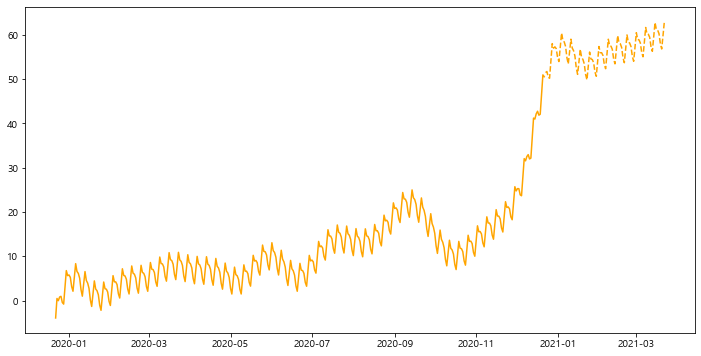

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(mealkit, color='orange')
plt.plot(mealkit_forecast, color='orange', ls = '--')

## fresheasy 검색량 예측

In [22]:
m2 = Prophet(yearly_seasonality=True, weekly_seasonality=True,
    daily_seasonality=True,)
m2.fit(fresheasy);

In [23]:
future2 = m2.make_future_dataframe(periods=90)
future2.tail()

,ds
452,2021-03-18
453,2021-03-19
454,2021-03-20
455,2021-03-21
456,2021-03-22


In [24]:
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat']].tail()

,ds,yhat
452,2021-03-18,22.952500
453,2021-03-19,21.220812
454,2021-03-20,19.248469
455,2021-03-21,19.652147
456,2021-03-22,22.278888


In [25]:
fresheasy_forecast = forecast2[367:]
fresheasy_forecast = fresheasy_forecast[['ds', 'yhat']]
fresheasy_forecast.set_index('ds', inplace=True, drop=True)
fresheasy_forecast

,yhat
ds,
2020-12-23,21.681788
2020-12-24,21.938450
2020-12-25,20.758819
2020-12-26,19.268232
2020-12-27,20.077596
...,...
2021-03-18,22.952500
2021-03-19,21.220812
2021-03-20,19.248469


In [26]:
fresheasy = forecast2[:367]
fresheasy = fresheasy[['ds', 'yhat']]
fresheasy.set_index('ds', inplace=True, drop=True)
fresheasy

,yhat
ds,
2019-12-22,6.711385
2019-12-23,10.182030
2019-12-24,10.685162
2019-12-25,10.715418
2019-12-26,10.857885
...,...
2020-12-18,16.896708
2020-12-19,15.965211
2020-12-20,17.366871


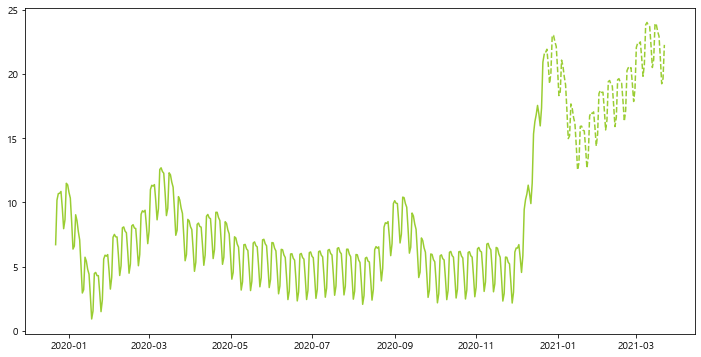

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(fresheasy, color='yellowgreen')
plt.plot(fresheasy_forecast, color='yellowgreen', ls = '--')

## 프레시지&밀키트 검색량 예측

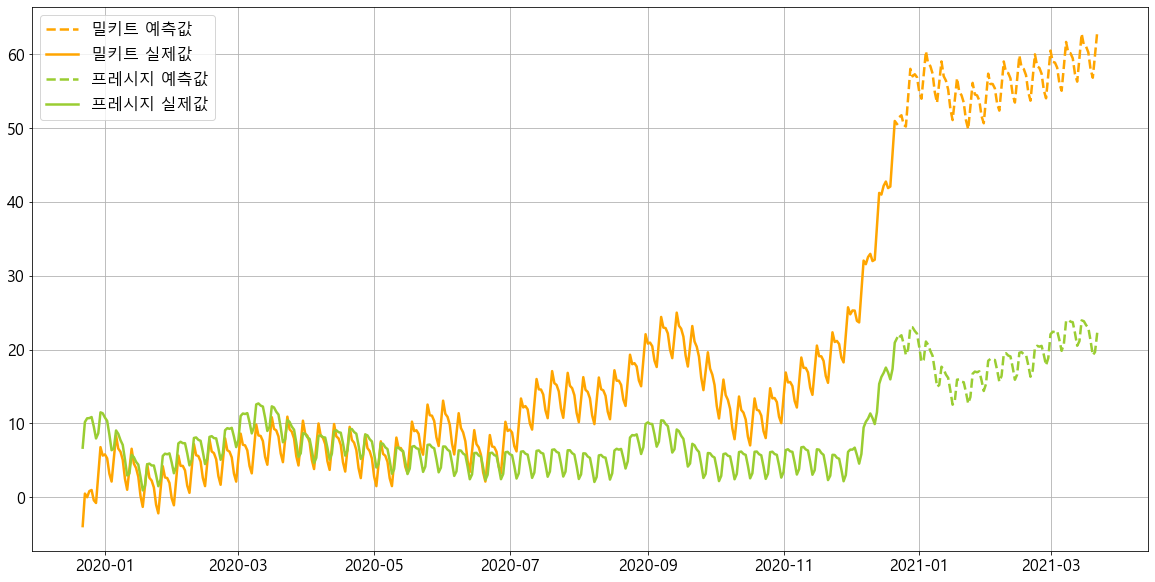

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(mealkit_forecast, color='orange', ls = '--', linewidth=2.5)
plt.plot(mealkit, color='orange', linewidth=2.5)
plt.plot(fresheasy_forecast, color='yellowgreen', ls = '--', linewidth=2.5)
plt.plot(fresheasy, color='yellowgreen', linewidth=2.5)
plt.grid()
plt.legend(['밀키트 예측값', '밀키트 실제값',
            '프레시지 예측값', '프레시지 실제값'], fontsize=16)
plt.savefig('../../images/밀키트_프레시지_예측값.png',dpi=400, bbox_inches='tight')

In [29]:
#plt.rcParams['axes.labelsize'] = 16
#plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16